부스팅계열  
- 앙상블 카테고리 중 의 하나  
- 약한 학습기(weak learner)들을 순차적으로 학습시켜 강한 학습기(Strong learner)를 만드는 방법  

작동원리  
        1. 이전에 잘못 예측한 데이터에 더 큰 가중치를 부여  
        2. 각 단계에서 이전 모델의 오류를 보완하는 새로운 모델을 학습  
        3. 최종 예측은 모든 모델의 가중 평균  

주요 알고리즘
- AdaBoost
- Gradient Boost
- XGboost
- LightGBM
- Catboost

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer #load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler #스케일러
from sklearn.ensemble import AdaBoostClassifier #AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc #매트릭 측정
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 로드 및 전처리
- 수치형 데이터 전처리 : 결측처리 / 스케링 / 정규화
- 범주형 데이터 전처리 : 원핫 / 레이블 인코딩

- 범주형 데이터 특화 : Catboost Model

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target # python 언패킹 : 위치를 맞춰서 분배
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링

In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=1)

adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
adaboost.fit(X_train_scaled, y_train)

c:\Users\jd421\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [5]:
y_pred = adaboost.predict(X_test_scaled)

In [6]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [7]:

classification_report(y_test, y_pred, target_names=data.target_names)

'              precision    recall  f1-score   support\n\n   malignant       0.98      0.95      0.96        43\n      benign       0.97      0.99      0.98        71\n\n    accuracy                           0.97       114\n   macro avg       0.97      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n'

```
'              precision    recall  f1-score   support
\n\n   malignant       0.98      0.95      0.96        43
\n      benign       0.97      0.99      0.98        71
\n\n    accuracy                           0.97       114
\n   macro avg       0.97      0.97      0.97       114
\nweighted avg       0.97      0.97      0.97       114\n'
```


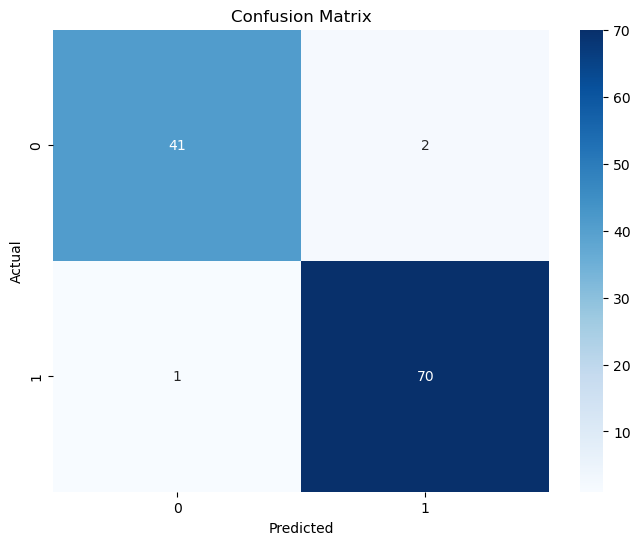

In [8]:
# 혼동 행렬 시각화

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC 커브



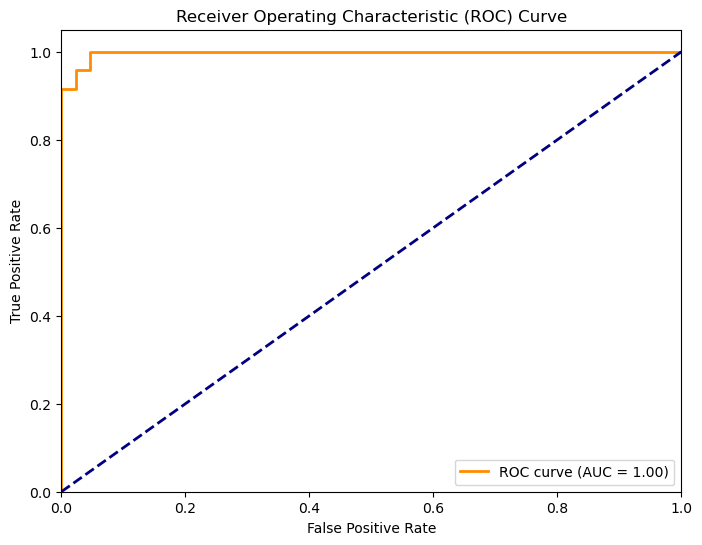

In [9]:
y_pred_proba = adaboost.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# 특성 중요도 시각화


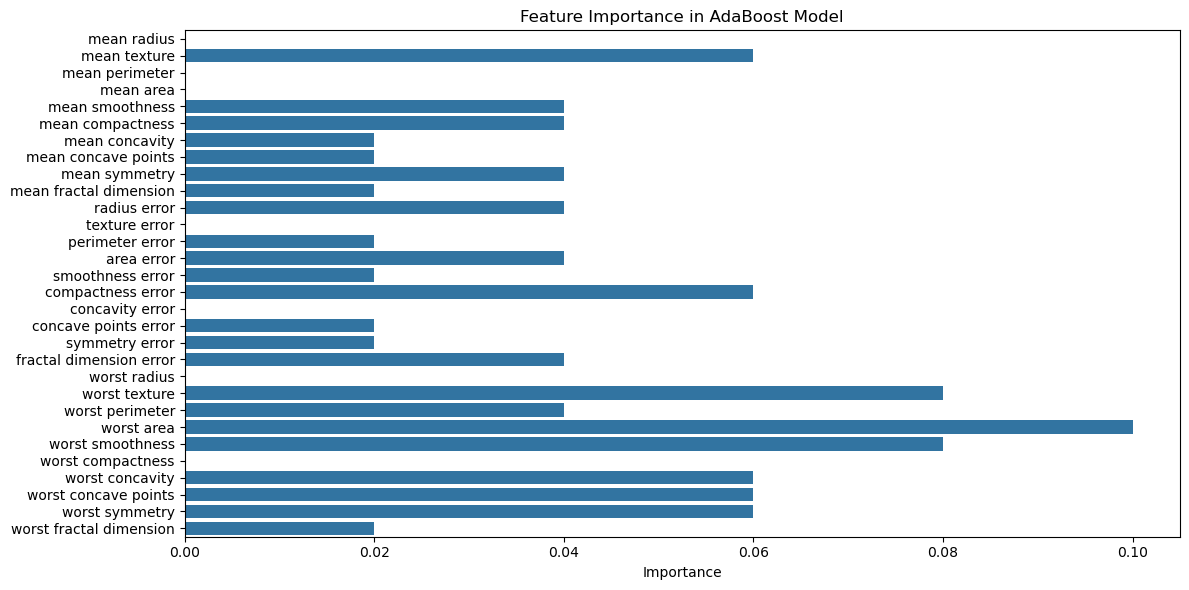

In [10]:
feature_importance = adaboost.feature_importances_
feature_names = data.feature_names

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in AdaBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# 학습곡선 확인

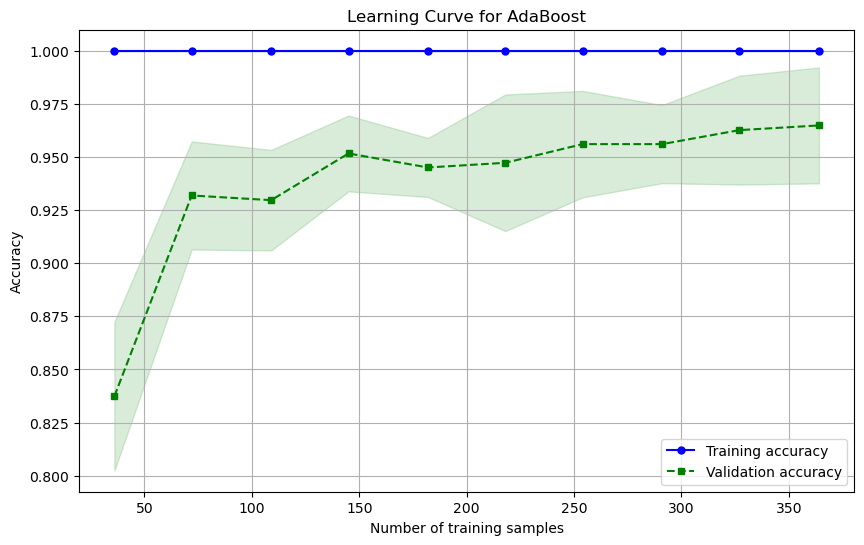

In [11]:
train_sizes, train_scores, test_scores = learning_curve(
    adaboost, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for AdaBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 교차검증

In [12]:

cv_scores = cross_val_score(adaboost, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

c:\Users\jd421\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jd421\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jd421\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jd421\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\jd4


Cross-validation scores: [0.96703297 0.97802198 0.98901099 0.97802198 0.91208791]
Mean CV score: 0.964835164835165
Standard deviation of CV scores: 0.027274008013166727
